# Python 3

http://www.pitt.edu/~naraehan/presentation/word2vec-try.html



In [1]:
# ! pip install six==1.10.0
# ! pip install matplotlib==2.0.2
# ! pip install nltk --user

# # Then restart kernel

In [4]:
# If not installed yet, run

! conda install gensim --yes

Solving environment: \ ^C
failed

CondaError: KeyboardInterrupt



In [1]:
# Check Python version
import sys
sys.version_info

sys.version_info(major=3, minor=6, micro=5, releaselevel='final', serial=0)

In [3]:
#  Turns on/off pretty printing 
%pprint

# Every returned Out[] is displayed, not just the last one. 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Pretty printing has been turned ON


In [4]:
# Import Word2Vec from gensim. 
# gensim is not installed system-wide. Install for yourself: pip install gensim --user
from gensim.models import Word2Vec


In [5]:
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
             ['this', 'is', 'the', 'second', 'sentence'],
             ['yet', 'another', 'sentence'],
             ['one', 'more', 'sentence'],
             ['and', 'the', 'final', 'sentence']]

In [6]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/ec2-user/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [7]:
from nltk import word_tokenize

mary = """Mary had a little lamb,
His fleece was white as snow,
And everywhere that Mary went,
The lamb was sure to go.
"Why does the lamb love Mary so?"
The eager children cry.
"Why, Mary loves the lamb, you know."
The teacher did reply."""

sentences = [word_tokenize(s) for s in mary.lower().split('\n')]
sentences

[['mary', 'had', 'a', 'little', 'lamb', ','],
 ['his', 'fleece', 'was', 'white', 'as', 'snow', ','],
 ['and', 'everywhere', 'that', 'mary', 'went', ','],
 ['the', 'lamb', 'was', 'sure', 'to', 'go', '.'],
 ['``', 'why', 'does', 'the', 'lamb', 'love', 'mary', 'so', '?', "''"],
 ['the', 'eager', 'children', 'cry', '.'],
 ['``',
  'why',
  ',',
  'mary',
  'loves',
  'the',
  'lamb',
  ',',
  'you',
  'know',
  '.',
  "''"],
 ['the', 'teacher', 'did', 'reply', '.']]

In [8]:
# train model
model = Word2Vec(sentences, min_count=1)

# summarize the loaded model
print(model)

Word2Vec(vocab=37, size=100, alpha=0.025)


In [9]:
# summarize vocabulary
words = list(model.wv.vocab)
print(words)

['mary', 'had', 'a', 'little', 'lamb', ',', 'his', 'fleece', 'was', 'white', 'as', 'snow', 'and', 'everywhere', 'that', 'went', 'the', 'sure', 'to', 'go', '.', '``', 'why', 'does', 'love', 'so', '?', "''", 'eager', 'children', 'cry', 'loves', 'you', 'know', 'teacher', 'did', 'reply']


In [10]:
# access vector for one word
#print(model['sentence'])
print(model['lamb'])

[-4.8249210e-03  2.0268788e-03  2.7844883e-03 -4.0283720e-03
  3.7022687e-03  4.4576856e-03  3.5992786e-03 -3.3358322e-03
 -3.5660199e-03  4.0316320e-04 -5.8286416e-05  7.6383963e-04
  1.8584054e-04 -2.9673174e-04  2.2946582e-03 -3.3327151e-04
 -2.3214614e-07  2.9566430e-03  4.5288042e-03 -1.5259129e-03
  3.5840236e-03 -4.5321919e-03 -2.5233207e-03 -4.9369675e-03
  2.3904608e-03 -1.0455288e-03  1.2890105e-03  1.4002195e-03
  1.3493350e-03  3.9531267e-03  1.6875938e-04  3.5949046e-04
 -1.3986361e-03  6.5270066e-04  5.0011841e-03  3.3800569e-03
 -3.8930175e-03  3.0704387e-03  2.0721208e-03  1.3348847e-04
 -2.0837290e-03 -2.9598982e-03  2.8016695e-03 -1.8117707e-05
 -2.4698896e-03  4.4172737e-03  1.9859320e-03 -4.7175814e-03
  1.6796011e-03  3.5075210e-03 -3.0974003e-03 -3.9590341e-03
  8.1004424e-04  1.4173293e-03 -9.1633090e-04 -2.3353205e-03
  4.1652359e-03 -1.4183504e-03 -1.8225648e-03  1.9340350e-03
  3.9467243e-03  2.1992366e-04 -9.5804967e-04 -8.4941543e-04
  2.9982233e-03  4.42227

/home/ec2-user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
# save model
model.save('model-py3.bin')

In [12]:
# load model
new_model = Word2Vec.load('model-py3.bin')
print(new_model)

Word2Vec(vocab=37, size=100, alpha=0.025)


In [14]:
model.wv.vocab

{'mary': <gensim.models.keyedvectors.Vocab at 0x7f5f2f82a4e0>,
 'had': <gensim.models.keyedvectors.Vocab at 0x7f5f2f82a518>,
 'a': <gensim.models.keyedvectors.Vocab at 0x7f5f2f82a588>,
 'little': <gensim.models.keyedvectors.Vocab at 0x7f5f2f82a6d8>,
 'lamb': <gensim.models.keyedvectors.Vocab at 0x7f5f2f82a5c0>,
 ',': <gensim.models.keyedvectors.Vocab at 0x7f5f2f66d710>,
 'his': <gensim.models.keyedvectors.Vocab at 0x7f5f2f66da90>,
 'fleece': <gensim.models.keyedvectors.Vocab at 0x7f5f2f66d7f0>,
 'was': <gensim.models.keyedvectors.Vocab at 0x7f5f2f66d978>,
 'white': <gensim.models.keyedvectors.Vocab at 0x7f5f2f66d160>,
 'as': <gensim.models.keyedvectors.Vocab at 0x7f5f2f66dc50>,
 'snow': <gensim.models.keyedvectors.Vocab at 0x7f5f2f66dd68>,
 'and': <gensim.models.keyedvectors.Vocab at 0x7f5f2f66de10>,
 'everywhere': <gensim.models.keyedvectors.Vocab at 0x7f5f2f66dba8>,
 'that': <gensim.models.keyedvectors.Vocab at 0x7f5f2f66db00>,
 'went': <gensim.models.keyedvectors.Vocab at 0x7f5f2f66

## Visualization through PCA (principal component analysis)


In [15]:
from sklearn.decomposition import PCA
from matplotlib import pyplot

/home/ec2-user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


Text(0.00110717,-0.0128662,'mary')

Text(-0.00746466,-0.00718724,'had')

Text(0.00919538,0.0078851,'a')

Text(0.0164734,-6.91244e-05,'little')

Text(-0.0101397,0.00830448,'lamb')

Text(-0.000445233,0.00283548,',')

Text(0.00765202,6.28015e-05,'his')

Text(0.00952564,0.017264,'fleece')

Text(-0.00526661,-0.00306005,'was')

Text(0.00126306,0.00429085,'white')

Text(0.0125804,0.00225521,'as')

Text(-0.0107444,0.00119982,'snow')

Text(0.00617571,-0.00905148,'and')

Text(-0.00316782,-0.0140923,'everywhere')

Text(-0.0114975,0.00273779,'that')

Text(-0.00149995,-0.00668067,'went')

Text(0.0106369,-0.00901344,'the')

Text(0.00437849,0.00644153,'sure')

Text(-0.00383486,-0.00258108,'to')

Text(-0.00302017,-0.00393619,'go')

Text(-0.000105465,0.0054392,'.')

Text(0.00639219,-0.00631838,'``')

Text(-0.0121228,-0.00507437,'why')

Text(-0.0152244,-0.00719417,'does')

Text(0.00937894,-0.00602174,'love')

Text(0.00343224,0.00917907,'so')

Text(0.00120748,-0.00899609,'?')

Text(0.00265993,-0.00353333,"''")

Text(0.00738521,0.00199986,'eager')

Text(0.00476089,-0.00329027,'children')

Text(-0.0061637,0.0117836,'cry')

Text(-0.00443436,0.00125654,'loves')

Text(-0.00900179,0.00792465,'you')

Text(-0.00310564,0.00877525,'know')

Text(-0.00522066,0.00455788,'teacher')

Text(-0.00330716,0.00810703,'did')

Text(0.00156183,-0.00333394,'reply')

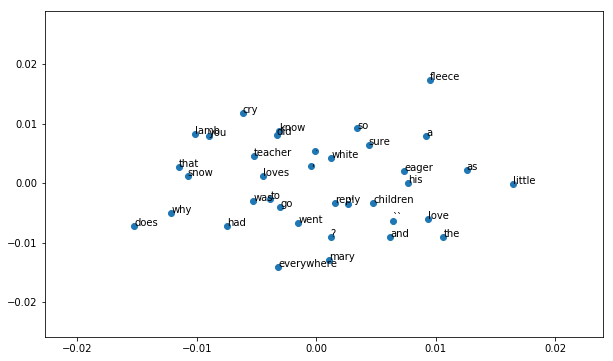

In [16]:
pyplot.rcParams['figure.figsize'] = (10, 6)

# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)

for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()


## Load Google's pre-trained word2vec embedding

    Good news! I have already downloaded the model file and saved it in our shared_data folder on h2p.



In [24]:
! ls /home/ec2-user/data


GoogleNews-vectors-negative300.bin.gz


In [25]:
from gensim.models import KeyedVectors

filename = '/home/ec2-user/data/GoogleNews-vectors-negative300.bin.gz'
model = KeyedVectors.load_word2vec_format(filename, binary=True)

# calculate: (king - man) + woman = ?
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)
# works! 


MemoryError: 

In [23]:
result = model.most_similar(positive=['woman', 'actor'], negative=['man'], topn=1)
print(result)
# works again!

[('actress', 0.860262393951416)]


In [24]:
result = model.most_similar(positive=['dog', 'kitten'], negative=['baby'], topn=1)
print(result)
# fail. Seems 100 billion words of news data weren't enough to learn about kittens and puppies... 

[('dogs', 0.7231072187423706)]



## Load Stanford's pre-trained GloVe embedding

    Again, the model files are already downloaded in the shared_data folder.


In [25]:
# GloVe file format must be first convertd to Word2Vec format
# Something that needs to be done ONCE: you guys don't need to do this! 

from gensim.scripts.glove2word2vec import glove2word2vec

# vdir = '/ihome/pyling/shared_data/word_vectors/'
vdir = '/Users/jorismattheijssens/Downloads/glove.6B/'
glove_input_file = vdir + 'glove.6B.100d.txt'
word2vec_output_file = vdir + 'glove.6B.100d.txt.word2vec'

glove2word2vec(glove_input_file, word2vec_output_file)

(400000, 100)

In [26]:
from gensim.models import KeyedVectors
# load the Stanford GloVe model
filename = vdir + 'glove.6B.100d.txt.word2vec'
model = KeyedVectors.load_word2vec_format(filename, binary=False)

# calculate: (king - man) + woman = ?
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

[('queen', 0.7698541283607483)]


In [27]:
result = model.most_similar(positive=['dog', 'kitten'], negative=['baby'], topn=1)
print(result)
# Woo hoo! 6 billion words of Wikipedia --> successful learning of kitten and puppy. 

[('puppy', 0.6481586694717407)]


In [28]:
result = model.most_similar(positive=['pittsburgh', 'eagles'], negative=['philadelphia'], topn=5)
print(result)
# Beautiful! 

[('steelers', 0.7623487710952759), ('vikings', 0.7566234469413757), ('falcons', 0.7381411790847778), ('panthers', 0.7375524640083313), ('broncos', 0.735093355178833)]


In [29]:
result = model.most_similar(positive=['turtle', 'snail'], negative=['shell'], topn=5)
print(result)
# Hmm...

[('wildflower', 0.6302022337913513), ('turtles', 0.5460652112960815), ('cichlid', 0.5293101668357849), ('songbird', 0.5284878611564636), ('tortoises', 0.5175418257713318)]


In [30]:
result = model.most_similar(positive=['cow', 'pork'], negative=['pig'], topn=5)
print(result)
# Yayy! 

[('beef', 0.7819944024085999), ('meat', 0.689876914024353), ('chicken', 0.5895066857337952), ('poultry', 0.5763587951660156), ('meats', 0.5711966753005981)]


In [31]:
result = model.most_similar(positive=['michelle', 'barack'], negative=['bush'], topn=5)
print(result)
# Huh! Is it because Laura Bush is still a Bush? 
# But George is not a very distinctive first name, and we can't do George W. 

[('sasha', 0.6619372963905334), ('sarah', 0.6275115609169006), ('julia', 0.6156176924705505), ('malia', 0.6076964139938354), ('jessica', 0.6059255003929138)]
